In [1]:
import wave
import json
import librosa
import csv
import numpy as np
from pywt import wavedec
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

2023-11-16 23:58:22.004923: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 23:58:22.046042: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 23:58:22.046075: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 23:58:22.046099: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 23:58:22.054119: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 23:58:22.054978: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
model_uri = '../modelh5/model_lstm_tuning.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 112, 64)           16896     
                                                                 
 dense_8 (Dense)             (None, 112, 32)           2080      
                                                                 
 flatten_2 (Flatten)         (None, 3584)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                229440    
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 5)                 165       
                                                                 
Total params: 250661 (979.14 KB)
Trainable params: 250

In [3]:
# import wave
# import json
# header = 'filename'
# for i in range(1, 41):
#     header += f' mfcc{i}'
# for i in range(1, 13):
#   header += f' chroma{i}'
# for i in range(1, 61):
#   header += f' cqt{i}'
# header += ' label'
# header = header.split()
# file = open('testing.csv', 'w', newline='')
# with file:
#     writer = csv.writer(file)
#     writer.writerow(header)



In [4]:
# dataset_path = '../data/testing_10/'

In [5]:
# for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
#         # ensure we're processing a genre sub-folder level
#         if dirpath is not dataset_path:
#             semantic_label = dirpath.split("/")[-1]
#             print("\nProcessing: {}".format(semantic_label))
#             for f in filenames:
#                 file_path = os.path.join(dirpath, f)
#                 to_append = f'{file_path}'
#                 y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
#                 coeffs = wavedec(y, 'db1', level=10)
#                 cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
#                 mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
#                 rms = librosa.feature.chroma_stft(y=cD1, sr=8000)
#                 cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
#                 combined_features = np.concatenate((mfcc, rms, cqt), axis=0)
#                 to_append = f'{file_path}'
#                 for e in combined_features:
#                     to_append += f' {np.mean(e.T, axis=0)}'
#                 to_append += f' {semantic_label}'
#                 file = open('testing.csv', 'a', newline='')
#                 with file:
#                     writer = csv.writer(file)
#                     writer.writerow(to_append.split())


In [6]:
data = pd.read_csv('./testing.csv')
data.head()

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/testing_10/MVP/New_MVP_135.wav,-409.528564,87.384094,26.037184,-19.667170,-30.942360,-22.674948,-22.804028,-23.051409,-34.245644,...,0.002009,0.001601,0.001465,0.001038,0.000982,0.000833,0.000616,0.000510,0.000491,MVP
1,../data/testing_10/MVP/New_MVP_192.wav,-337.002411,89.271080,14.186399,1.686405,-6.657608,-13.926779,-20.226974,-19.441204,-17.915880,...,0.002848,0.002626,0.003480,0.003186,0.003180,0.002202,0.001917,0.002559,0.002665,MVP
2,../data/testing_10/MVP/New_MVP_179.wav,-407.230621,70.930885,-13.684482,-34.369339,-21.889259,-15.245199,-11.328670,-9.168187,-16.146969,...,0.004742,0.004964,0.003947,0.003980,0.003126,0.003334,0.002728,0.002642,0.002220,MVP
3,../data/testing_10/MVP/New_MVP_165.wav,-406.872314,84.138229,27.318718,-15.585702,-28.959631,-22.787647,-22.402174,-23.848078,-31.116653,...,0.003096,0.002835,0.002835,0.002727,0.002162,0.001437,0.000839,0.000807,0.000667,MVP
4,../data/testing_10/MVP/New_MVP_024.wav,-479.023804,89.486000,8.549840,-0.640211,-7.605422,-15.150332,-16.487503,-13.620892,-10.753409,...,0.002732,0.001242,0.000721,0.001375,0.002052,0.002141,0.001541,0.000922,0.001057,MVP


In [7]:
X = data.drop(['label', 'filename'], axis=1)
y = data.iloc[:, -1]

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = tf.keras.models.load_model(model_uri)
pred = model.predict(X)
hasil = []
class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
# class_labels = ['MVP', 'MS', 'N', 'MR', 'AS']
for i in pred:
    # hasil.append(np.argmax(i))
    print('===')
    print(i)
    cek = np.argmax(i)
    print(f'Actual class: {cek}')
    print(f'Predicted class: {class_labels[cek]}')
    print('===')
    hasil.append(class_labels[cek])
y_p = np.argmax(pred, axis=1)


4/4 [==============================] - 1s 11ms/step
===
[1.0432592e-04 8.8511304e-05 8.1109947e-06 9.9973583e-01 6.3301253e-05]
Actual class: 3
Predicted class: MVP
===
===
[0.18671535 0.11345452 0.5023952  0.18616143 0.01127344]
Actual class: 2
Predicted class: MS
===
===
[8.5133663e-04 2.2286840e-03 1.3341576e-06 9.9690032e-01 1.8256331e-05]
Actual class: 3
Predicted class: MVP
===
===
[3.5529691e-04 1.1787931e-04 9.3305498e-06 9.9931508e-01 2.0238165e-04]
Actual class: 3
Predicted class: MVP
===
===
[7.9911493e-04 2.4621703e-03 1.6231740e-02 9.4916308e-01 3.1344000e-02]
Actual class: 3
Predicted class: MVP
===
===
[5.2671145e-05 4.6736910e-05 7.4466698e-06 9.9984598e-01 4.7073205e-05]
Actual class: 3
Predicted class: MVP
===
===
[9.2707836e-04 1.3147469e-04 1.6614364e-04 9.9825042e-01 5.2479329e-04]
Actual class: 3
Predicted class: MVP
===
===
[2.2025315e-04 1.3071502e-04 5.8209389e-06 9.9945509e-01 1.8818243e-04]
Actual class: 3
Predicted class: MVP
===
===
[7.7282195e-04 1.3596511

In [9]:
cm = confusion_matrix(y, hasil)
cm

array([[20,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0],
       [ 0,  0, 18,  2,  0],
       [ 0,  0,  1, 19,  0],
       [ 0,  0,  0,  0, 20]])

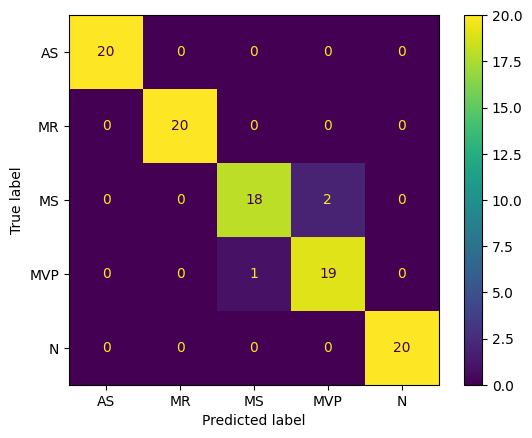

In [10]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.show()

In [11]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [12]:
print("Sensitivity :" , TPR, 'mean: ', np.mean(TPR))
print("Specificity :" , TNR, 'mean: ', np.mean(TNR))
print("Precision :" , PPV, 'mean: ', np.mean(PPV))
print("Accuracy :" , ACC, 'mean: ', np.mean(ACC))
print("FPR :" , FPR, 'mean: ', np.mean(FPR))
print("FNR :" , FNR, 'mean: ', np.mean(FNR))
print("NPV :" , NPV, 'mean: ', np.mean(NPV))
print("FDR :" , FDR, 'mean: ', np.mean(FDR))
print("f1_score:", 2 * (PPV * TPR) / (PPV + TPR), 'mean: ', np.mean(2 * (PPV * TPR) / (PPV + TPR)))

Sensitivity : [1.   1.   0.9  0.95 1.  ] mean:  0.97
Specificity : [1.     1.     0.9875 0.975  1.    ] mean:  0.9925
Precision : [1.         1.         0.94736842 0.9047619  1.        ] mean:  0.9704260651629072
Accuracy : [1.   1.   0.97 0.97 1.  ] mean:  0.9879999999999999
FPR : [0.     0.     0.0125 0.025  0.    ] mean:  0.0075000000000000015
FNR : [0.   0.   0.1  0.05 0.  ] mean:  0.030000000000000006
NPV : [1.         1.         0.97530864 0.98734177 1.        ] mean:  0.9925300828254414
FDR : [0.         0.         0.05263158 0.0952381  0.        ] mean:  0.02957393483709273
f1_score: [1.         1.         0.92307692 0.92682927 1.        ] mean:  0.9699812382739212
